In [1]:
"""
================================================
Coding - Decoding simulation of a random message
================================================
This example shows a simulation of the transmission of a binary message
through a gaussian white noise channel with an LDPC coding and decoding system.
"""


import numpy as np
from pyldpc import make_ldpc, decode, get_message, encode
from matplotlib import pyplot as plt
import random 


n = 30
d_v = 2
d_c = 3
seed = np.random.RandomState(42)
##################################################################
# First we create an LDPC code i.e a pair of decoding and coding matrices
# H and G. H is a regular parity-check matrix with d_v ones per row
# and d_c ones per column

H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

n, k = G.shape
print("Number of coded bits:", k)
print("taille de H =", H.shape, "et taille de G = ", G.shape)


Number of coded bits: 11


In [2]:
print(seed)

#print("H = ",H)

#print("G = ")
#print(G)



print(H.shape)

print(G.shape)

A = np.dot(H,G)
A.shape
#print(A)

RandomState(MT19937)
(20, 30)
(30, 11)


(20, 11)

In [3]:
message = np.array([1,1,0,1,0,0,1,0,1,1,1])
c = np.dot(message.T,G.T)%(-2)
print("c = ",c)
len(c)

c2 = c
for i in range(len(c)):
    if c[i] == 0:
        c2[i] = 1

print("c2 = ",c2)

#snr = np.zeros((30,1))
#snr

c3 = [k + round(np.random.normal(0, 0.2),2) for k in c2]
print("c3 = ",c3)





c =  [-1 -1  0 -1  0  0 -1  0 -1 -1 -1  0  0  0 -1  0 -1  0  0  0 -1  0 -1 -1
 -1  0  0  0 -1  0]
c2 =  [-1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1
 -1  1  1  1 -1  1]
c3 =  [-1.25, -1.12, 0.99, -0.81, 0.86, 1.15, -0.86, 0.8200000000000001, -0.86, -1.08, -0.94, 0.9, 1.04, 0.83, -1.17, 1.18, -1.26, 1.09, 1.08, 1.18, -1.09, 0.84, -1.1, -1.34, -0.63, 0.88, 0.84, 0.84, -1.23, 0.99]


In [13]:
def check_nb_err(message_vrai,message_decode):
    nb_faute = 0
    for i in range(len(message_vrai)):
        if message_decode[i] == message_vrai[i] :
            nb_faute += 0
        else:
            nb_faute += 1
    return print("il y a : ",nb_faute," nombre d'erreurs")
    
def val_abs(message):
    message_corrige = []
    for i in range(len(message)):
        if message[i] >= 0:
            message_corrige.append(1)
        else:
            message_corrige.append(-1)
    return message_corrige

c3_abs = val_abs(c3)
print("c3_abs = ", c3_abs)

check_nb_err(c2,c3_abs)

def add_error(message):
    for i in range(2): # change de bit 1 seul sign
        stop = 0
        bit_faux = random.randint(0,len(message)-1)
        print(" bit_faux = ", bit_faux)
        print("\n")
        while abs(message[bit_faux]) > 1 and stop < 30 : #to be sure to change the sign
            stop += 1
            bit_faux = random.randint(0,len(message)-1)
        if message[bit_faux] <= 0:
            message[bit_faux] += 1
        else: 
            message[bit_faux] -= 1
    return message

c_err = add_error(c3)
check_nb_err(c2,val_abs(c_err))
print("c_err = ", c_err)
        

c3_abs =  [-1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1]
il y a :  2  nombre d'erreurs
 bit_faux =  24


 bit_faux =  25


il y a :  2  nombre d'erreurs
c_err =  [-1.25, -1.12, 0.99, -0.81, 0.86, 1.15, 0.14, 0.8200000000000001, -0.86, -1.08, -0.94, 0.9, 1.04, 0.83, -1.17, 1.18, -1.26, 1.09, 1.08, 1.18, -1.09, 0.84, -1.1, -1.34, 0.37, 0.88, 0.84, 0.84, -1.23, 0.99]


In [5]:
y = encode(G,message,9999)
print("y = ",y)

maxiter = 1500

D = decode(H, np.array(c_err),9999,maxiter)
print("D = ",D)
len(D)

x = get_message(G, D)

print("x = ",x)

print("message initial = ",message)
check_nb_err(message,x)



y =  [-1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.]
D =  [1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0]


C:\Users\yanna\anaconda3\lib\site-packages\pyldpc\decoder.py:48: RuntimeWarning: divide by zero encountered in true_divide
  Lc = 2 * y / var
C:\Users\yanna\anaconda3\lib\site-packages\pyldpc\decoder.py:62: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  warnings.warn("""Decoding stopped before convergence. You may want


x =  [1 1 0 1 0 0 0 0 1 1 1]
message initial =  [1 1 0 1 0 0 1 0 1 1 1]
il y a :  1  nombre d'erreurs


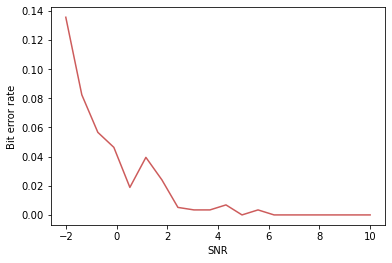

In [6]:
##################################################################
# Now we simulate transmission for different levels of noise and
# compute the percentage of errors using the bit-error-rate score
# The coding and decoding can be done in parallel by column stacking.

errors = []
snrs = np.linspace(-2, 10, 20)
v = np.arange(k) % 2  # fixed k bits message
n_trials = 53  # number of transmissions with different noise
V = np.tile(v, (n_trials, 1)).T  # stack v in columns

for snr in snrs:
    y = encode(G, V, snr, seed=seed)
    #print("taille de y = ",len(y),' y encode = ',y)
    D = decode(H, y, snr)
    #print("taille de D = ",D.shape,' D decode = ',D)
    error = 0.
    for i in range(n_trials):
        x = get_message(G, D[:, i])
        
        error += abs(v - x).sum() / (k * n_trials)
    errors.append(error)
    #print(" error = ", error)


plt.figure()
plt.plot(snrs, errors, color="indianred")
plt.ylabel("Bit error rate")
plt.xlabel("SNR")
plt.show()

In [7]:



print(V.shape)
print(v.shape)
print(G.shape)
print(H.shape)

y

(11, 53)
(11,)
(30, 11)
(20, 30)


array([[ 0.99579291,  1.02446433,  1.08623338, ...,  1.17742319,
         0.99165666,  1.48990636],
       [-0.51478946, -0.71825772, -1.40377618, ..., -0.61115098,
        -1.40535408, -0.55379618],
       [ 0.9600078 ,  0.91219785,  0.86703439, ...,  0.7162024 ,
         1.24931011,  1.00607627],
       ...,
       [ 0.49695404,  1.02148581,  0.85100665, ...,  0.95838424,
         0.69833361,  1.32207989],
       [-1.23521533, -0.74431307, -0.94097985, ..., -0.72520974,
        -0.91287997, -0.83376229],
       [-0.79219637, -0.66868219, -0.76541599, ..., -0.78688827,
        -0.86048515, -1.19898653]])

In [8]:
#y = encode(G,c,snr)
#print("y = ",y)

#D = decode(H, y)
#print("D = ",D)

In [9]:
import numpy as np
from pyldpc import make_ldpc, encode, decode, get_message
import time

n = 15
d_v = 4
d_c = 5
snr = 10
maxiter=100
H, G = make_ldpc(n, d_v, d_c, systematic=True, sparse=True)
k = G.shape[1]
v = np.random.randint(2, size=k)
y = encode(G, v, snr)
#d = decode(H, y, snr, maxiter=100, log=True)
d = decode(H, y, snr, maxiter)
x = get_message(G, d)
assert abs(x - v).sum() == 0

In [10]:
def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff

In [11]:

print("hello here")
# encode/decode messages for different SNR vals
mess_num = int(1e3)
tic_incr = mess_num/4
v = np.random.randint(2, size=(mess_num,k))
min_snr=0
max_snr=10
snrs = np.arange(min_snr,max_snr,0.5)
errs = np.array(())
times = np.array(())
for snr in snrs:
    print
    err_num = 0
    time_tot = 0
    current = time.time()
    for i in range(mess_num):
        v_i = v[i,:]
        #print("v_i.shape = ",v_i.shape)
        #print("G.shape = ",G.shape)
        #print("SNR.shape = ",snr)
        y = encode(G, v_i, snr)
        #print("y = ", y.shape)
        d = decode(H, y, snr, maxiter)
        x = get_message(G, d)
        if abs(x-v_i).sum() != 0 :
            err_num = err_num + 1
        if (i+1) % tic_incr == 0:
            time_tot = timer_update(i,current,time_tot,tic_incr)
    err = float(err_num)/mess_num
    print('SNR: {:04.3f}:\n -> BER: {:03.2f}\n -> Total Time: {:03.2f}s'.format(snr,err,time_tot))
    errs=np.append(errs,err)
    times=np.append(times,time_tot)

hello here


C:\Users\yanna\anaconda3\lib\site-packages\pyldpc\decoder.py:62: UserWarning: Decoding stopped before convergence. You may want
                       to increase maxiter
  warnings.warn("""Decoding stopped before convergence. You may want


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 1.52s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 3.01s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 4.69s


KeyboardInterrupt: 

In [ ]:
# plot results
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.semilogy(snrs,errs,'o-') # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Regular LDPC ({},{},{})'.format(n,k,n-k))
ax2.plot(snrs,times,'o-') # plot decode timing for different SNRs
ax2.set_xlabel('$E_b/N_0$')
ax2.set_ylabel('Decoding Time [s]')
ax2.annotate('Total Runtime: {:03.2f}s'.format(np.sum(times)),
            xy=(1, 0.35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(n,k))
plt.show()